# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | newman
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | port hueneme
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | darwin
Processing Record 11 of Set 1 | vargashi
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | alajarvi
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | sumenep
Processing Record 23 of 

Processing Record 39 of Set 4 | viligili
City not found. Skipping...
Processing Record 40 of Set 4 | at taj
Processing Record 41 of Set 4 | aasiaat
Processing Record 42 of Set 4 | kapuskasing
Processing Record 43 of Set 4 | walvis bay
Processing Record 44 of Set 4 | anabar
City not found. Skipping...
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | falenki
Processing Record 48 of Set 4 | saryozek
Processing Record 49 of Set 4 | byron bay
Processing Record 0 of Set 5 | serdar
Processing Record 1 of Set 5 | punta arenas
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 4 of Set 5 | entebbe
Processing Record 5 of Set 5 | gizo
Processing Record 6 of Set 5 | ola
Processing Record 7 of Set 5 | malyye derbety
Processing Record 8 of Set 5 | corner brook
Processing Record 9 of Set 5 | naze
Processing Record 10 of Set 5 | vorgashor
Processing Rec

Processing Record 30 of Set 8 | xinyi
Processing Record 31 of Set 8 | kertih
Processing Record 32 of Set 8 | acajutla
Processing Record 33 of Set 8 | mawu
Processing Record 34 of Set 8 | kuqa
Processing Record 35 of Set 8 | oneida
Processing Record 36 of Set 8 | san andres
Processing Record 37 of Set 8 | portland
Processing Record 38 of Set 8 | batie
Processing Record 39 of Set 8 | manggar
Processing Record 40 of Set 8 | asau village
City not found. Skipping...
Processing Record 41 of Set 8 | strezhevoy
Processing Record 42 of Set 8 | wagar
Processing Record 43 of Set 8 | mahina
Processing Record 44 of Set 8 | mombetsu
Processing Record 45 of Set 8 | carnarvon
Processing Record 46 of Set 8 | tchibanga
Processing Record 47 of Set 8 | saint-pierre
Processing Record 48 of Set 8 | jieyang
Processing Record 49 of Set 8 | ta`u
Processing Record 0 of Set 9 | taperoa
Processing Record 1 of Set 9 | lesnoy
Processing Record 2 of Set 9 | espargos
City not found. Skipping...
Processing Record 3 of

City not found. Skipping...
Processing Record 20 of Set 12 | floro
Processing Record 21 of Set 12 | saint clairsville
Processing Record 22 of Set 12 | phan thiet
Processing Record 23 of Set 12 | maxixe
Processing Record 24 of Set 12 | charters towers
Processing Record 25 of Set 12 | itoman
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | adigrat
Processing Record 28 of Set 12 | sinjai
Processing Record 29 of Set 12 | mocorito
Processing Record 30 of Set 12 | port moresby
Processing Record 31 of Set 12 | kathu
Processing Record 32 of Set 12 | downpatrick
Processing Record 33 of Set 12 | staritsa
Processing Record 34 of Set 12 | nukunonu
City not found. Skipping...
Processing Record 35 of Set 12 | vadso
Processing Record 36 of Set 12 | pozzallo
Processing Record 37 of Set 12 | kitami
Processing Record 38 of Set 12 | thunder bay
Processing Record 39 of Set 12 | tanggu
Processing Record 40 of Set 12 | balotra
Processing Record 41 of Set 12 | bandarbeyla
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Export the City_Data into a csv
city_data_df.to_csv('cities', index_label="City_ID")

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

    
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,newman,37.3138,-121.0208,16.80,11,100,0.79,US,1686412668
1,bethel,41.3712,-73.4140,22.45,60,0,4.12,US,1686412669
2,luderitz,-26.6481,15.1594,15.50,77,0,3.71,NA,1686412669
3,taoudenni,22.6783,-3.9836,43.79,8,1,6.72,ML,1686412669
4,port hueneme,34.1478,-119.1951,19.37,92,100,2.57,US,1686412643


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,newman,37.3138,-121.0208,16.80,11,100,0.79,US,1686412668
1,bethel,41.3712,-73.4140,22.45,60,0,4.12,US,1686412669
2,luderitz,-26.6481,15.1594,15.50,77,0,3.71,NaN,1686412669
3,taoudenni,22.6783,-3.9836,43.79,8,1,6.72,ML,1686412669
4,port hueneme,34.1478,-119.1951,19.37,92,100,2.57,US,1686412643


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

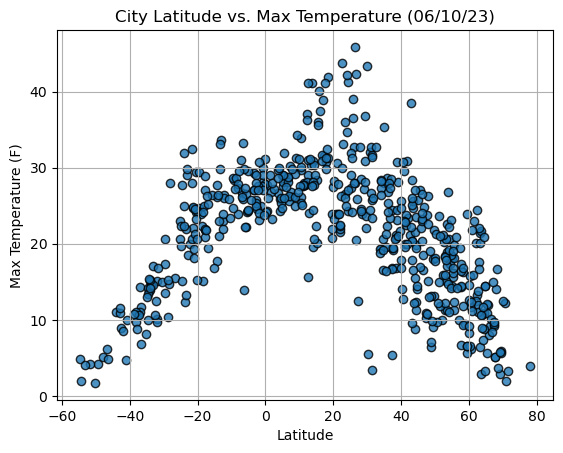

In [8]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

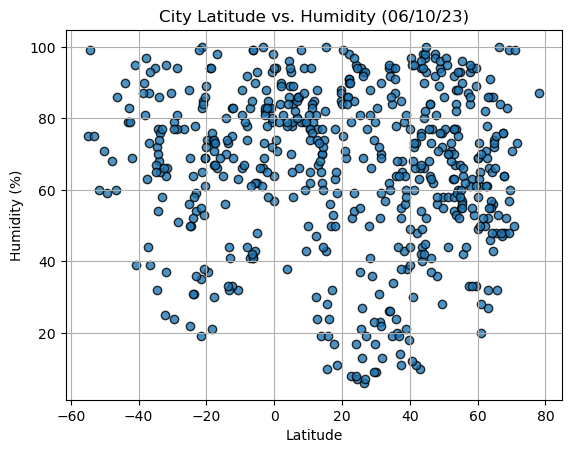

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

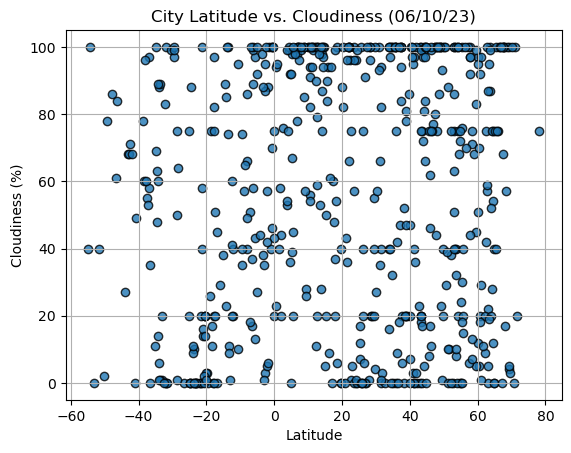

In [10]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

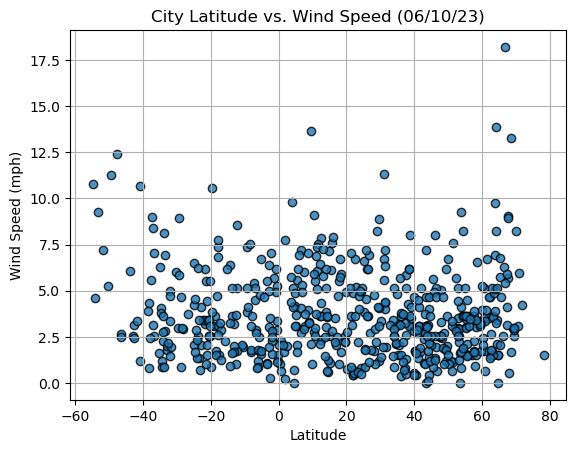

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    #Calcualte linear regression 
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    regress_values = x_values*slope+intercept 
    line_eq = "y="+str(round(slope,2))+"x +"+str(round(intercept,2))
    text_coordinate = (10, 10)

    #Creating the plot 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinate,fontsize = 14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is :{rvalue**2}")
    plt.show

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Import the cities list
cities = pd.read_csv("cities")

# Create a DataFrame with the Northern Hemisphere data
northern_hemisphere_df = cities[cities["Lat"] >= 0]

# Show the DataFrame
northern_hemisphere_df
# Display sample data
northern_hemisphere_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,newman,37.3138,-121.0208,16.80,11,100,0.79,US,1686412668
1,1,bethel,41.3712,-73.4140,22.45,60,0,4.12,US,1686412669
3,3,taoudenni,22.6783,-3.9836,43.79,8,1,6.72,ML,1686412669
4,4,port hueneme,34.1478,-119.1951,19.37,92,100,2.57,US,1686412643
5,5,hamilton,39.1834,-84.5333,28.12,38,20,3.09,US,1686412669


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Import the cities list
cities = pd.read_csv("cities")

# Create a DataFrame with the Southern Hemisphere data
southern_hemisphere_df = cities[cities["Lat"] < 0]

# Show the DataFrame
southern_hemisphere_df
# Display sample data
southern_hemisphere_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,luderitz,-26.6481,15.1594,15.50,77,0,3.71,NaN,1686412669
8,8,waitangi,-43.9535,-176.5597,11.01,90,27,6.09,NZ,1686412669
9,9,darwin,-12.4611,130.8418,22.99,83,60,1.03,AU,1686412506
11,11,east london,-33.0153,27.9116,17.14,58,1,1.76,ZA,1686412670
13,13,blackmans bay,-43.0167,147.3167,10.85,79,68,2.56,AU,1686412670


###  Temperature vs. Latitude Linear Regression Plot

The r-value is :0.5224901195879941


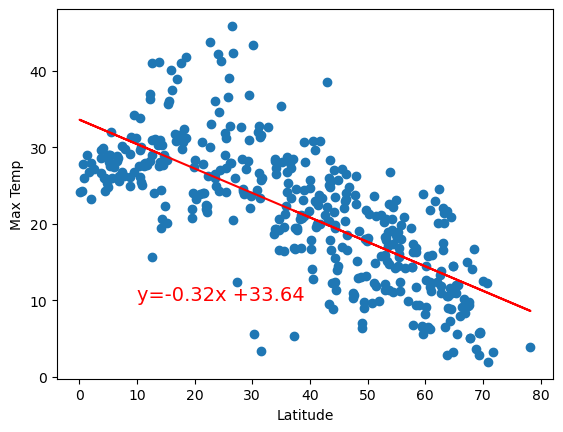

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

The r-value is :0.7221642689729675


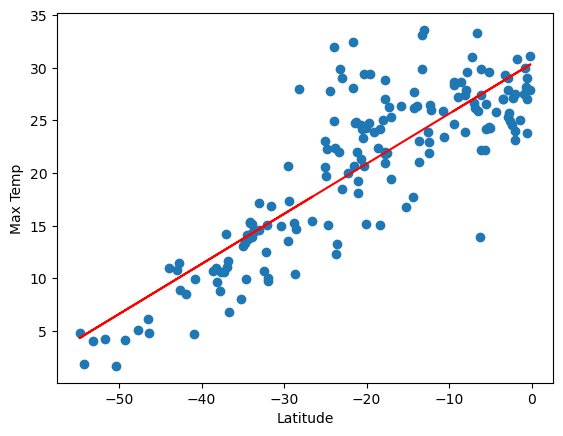

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

**Discussion about the linear relationship:** The correlation between latitude and maximum temperature is strong for both the hemispheres. It is higher for southern hemisphere (0.70), indicating that as we move away from the equator, the maximum temperature keeps dropping in a more linear manner.

### Humidity vs. Latitude Linear Regression Plot

The r-value is :0.003015386301682264


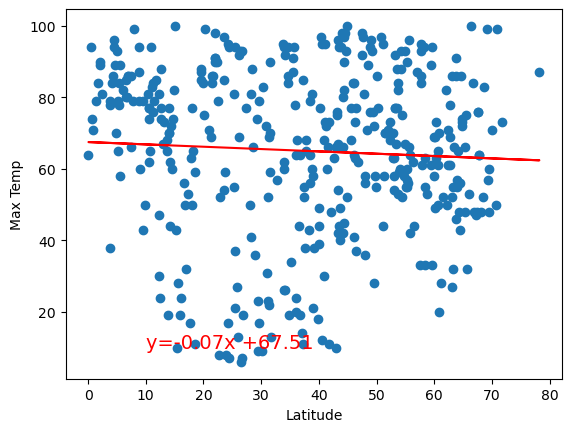

In [17]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

The r-value is :0.00021863399647441384


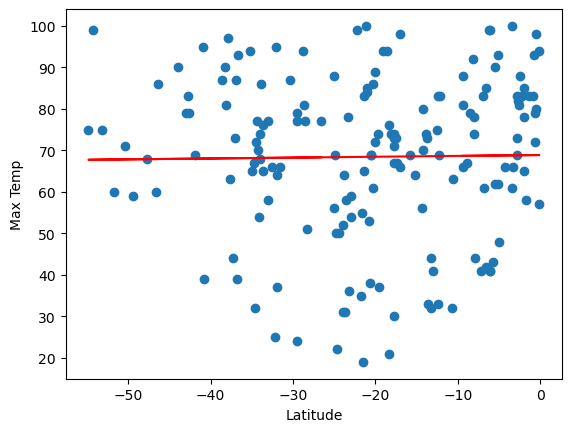

In [18]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is :0.014326411701365794


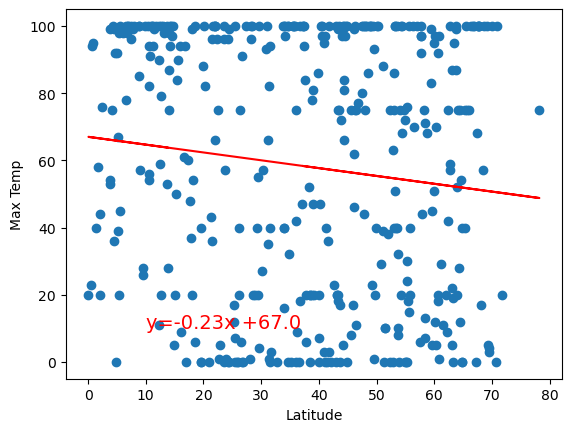

In [19]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

The r-value is :0.007913119025181858


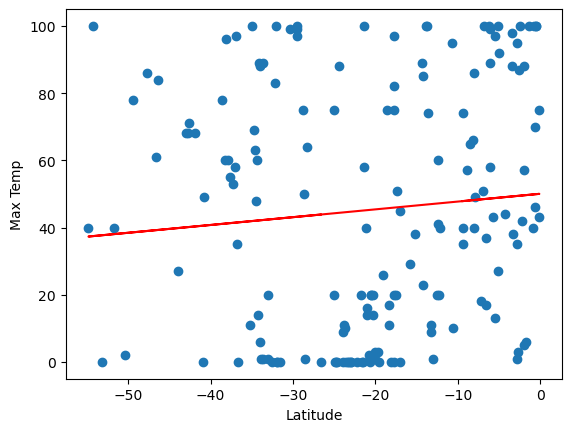

In [20]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is :0.014326411701365794


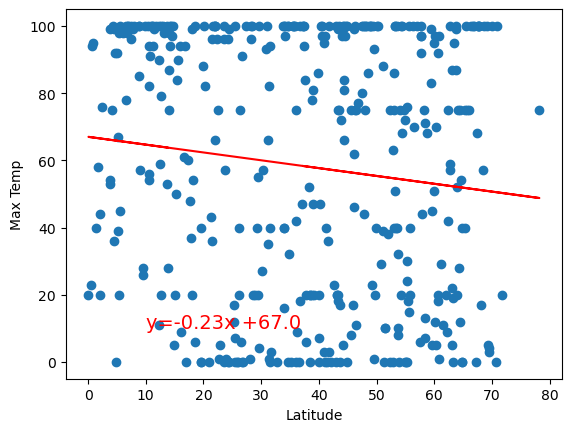

In [21]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

The r-value is :0.06689743772327532


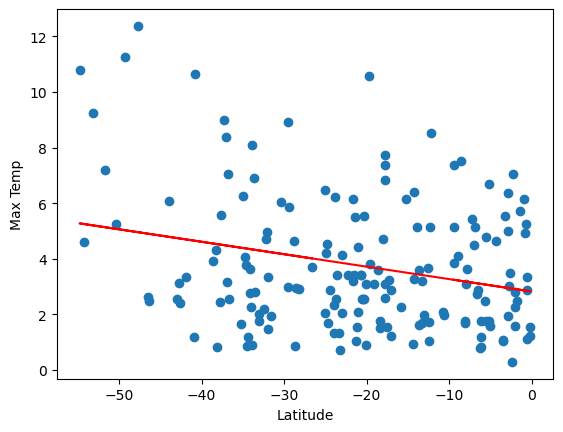

In [22]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Max Temp",  (10, 10))

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE